yt : [INFO     ] 2019-04-14 18:56:24,114 Reading m25n256_151.hdf5
yt : [INFO     ] 2019-04-14 18:56:24,315 Restoring halo attributes
yt : [INFO     ] 2019-04-14 18:56:35,371 Restoring galaxy attributes
yt : [INFO     ] 2019-04-14 18:56:36,219 Linking galaxies and halos
yt : [INFO     ] 2019-04-14 18:56:36,256 Creating sublists
yt : [INFO     ] 2019-04-14 18:56:36,266 Reading m25n256_105.hdf5
yt : [INFO     ] 2019-04-14 18:56:36,640 Restoring halo attributes
yt : [INFO     ] 2019-04-14 18:56:50,768 Restoring galaxy attributes
yt : [INFO     ] 2019-04-14 18:56:51,017 Linking galaxies and halos
yt : [INFO     ] 2019-04-14 18:56:51,037 Creating sublists


There are  913 galaxies in the snapshot file 616 are central galaxies
There are 217 galaxies with stellar mass greater than 10^10Msun
There are 46 galaxies with HI mass greater than 10^10Msun
There are 24 galaxies with both HI and stellar mass greater than 10^10Msun


/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log


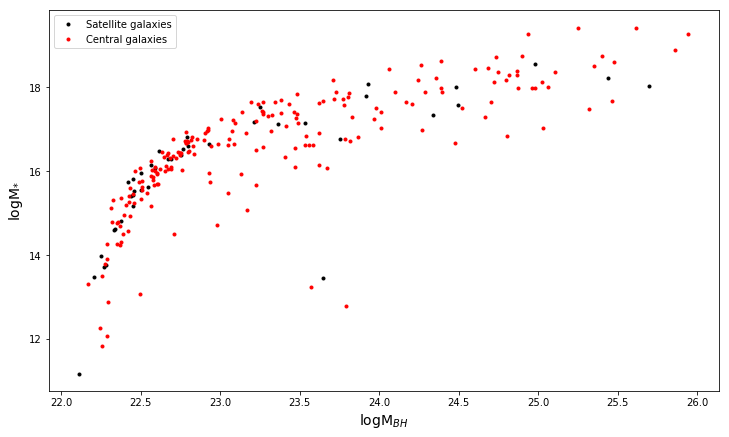

In [11]:
import caesar
import pylab as pl
import numpy as np
from pygadgetreader import *

cs1 = 'm25n256_151.hdf5'
cs2 = 'm25n256_105.hdf5'

snap1, snap2 = caesar.load(cs1), caesar.load(cs2)

gal1 = snap1.galaxies
cen_gal = snap1.central_galaxies
print('There are ', len(gal1), 'galaxies in the snapshot file', len(cen_gal), 'are central galaxies')

st_mss = [i.masses['total'] for i in gal1 if i.masses['stellar'] > 1e10]
HI_mss = [i.masses['total'] for i in gal1 if i.masses['HI'] > 1e10]
both = [i.masses['total'] for i in gal1 if i.masses['HI'] > 1e10 and i.masses['stellar'] > 1e+10]


print('There are', len(st_mss), 'galaxies with stellar mass greater than 10^10Msun')
print('There are', len(HI_mss), 'galaxies with HI mass greater than 10^10Msun')
print('There are', len(both), 'galaxies with both HI and stellar mass greater than 10^10Msun')

bh_mss, st_m = [], []
bh_cntl, st_cntl = [], [] 

for i in gal1:
    if i.sfr > 0.2:
        if i.central == True:
            bh_cntl.append(i.masses['bh'])
            st_cntl.append(i.masses['stellar'])
        else:
            bh_mss.append(i.masses['bh'])
            st_m.append(i.masses['stellar'])
pl.figure(figsize = (12, 7))            
pl.plot(np.log(st_m), np.log(bh_mss), 'k.', label = 'Satellite galaxies')
pl.plot(np.log(st_cntl), np.log(bh_cntl), 'r.', label = 'Central galaxies')
pl.xlabel('logM$_{BH}$', fontsize = 14)
pl.ylabel('logM$_{*}$', fontsize = 14)
pl.legend()
pl.savefig('Mbh_v_Mst.eps', format = 'eps', dpi = 150)
pl.show()

/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


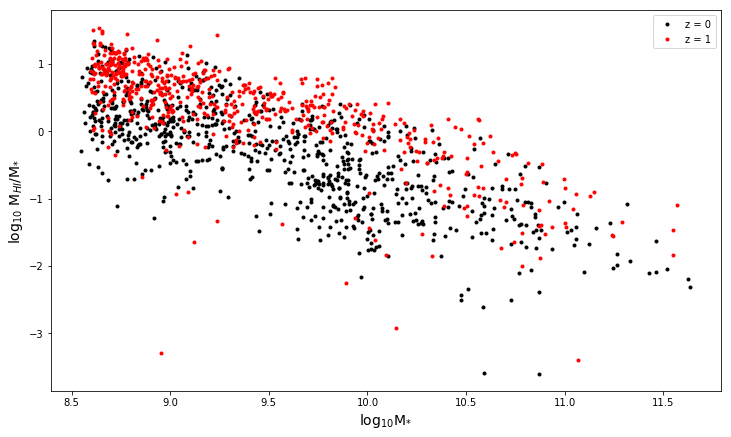

In [10]:
gal2 = snap2.galaxies
gas_frac1, stellar_mss1 = [], []

for i in gal1:
    gas_frac1.append(i.masses['HI']/i.masses['stellar'])
    stellar_mss1.append(i.masses['stellar'])

gas_frac2, stellar_mss2 = [], []

for i in gal2:
    gas_frac2.append(i.masses['HI']/i.masses['stellar'])
    stellar_mss2.append(i.masses['stellar'])
pl.figure(figsize = (12, 7))    
pl.plot(np.log10(stellar_mss1), np.log10(gas_frac1), 'k.', label = 'z = 0')
pl.plot(np.log10(stellar_mss2), np.log10(gas_frac2), 'r.', label = 'z = 1')
pl.xlabel('log$_{10}$M$_{*}$', fontsize = 14)
pl.ylabel('log$_{10}$ M$_{HI}$/M$_{*}$', fontsize = 14)
pl.legend()
pl.savefig('HI_frac.eps', format = 'eps', dpi = 150)
pl.show()

Returning DM    Positions
Returning STAR  Positions
Returning GAS   Positions


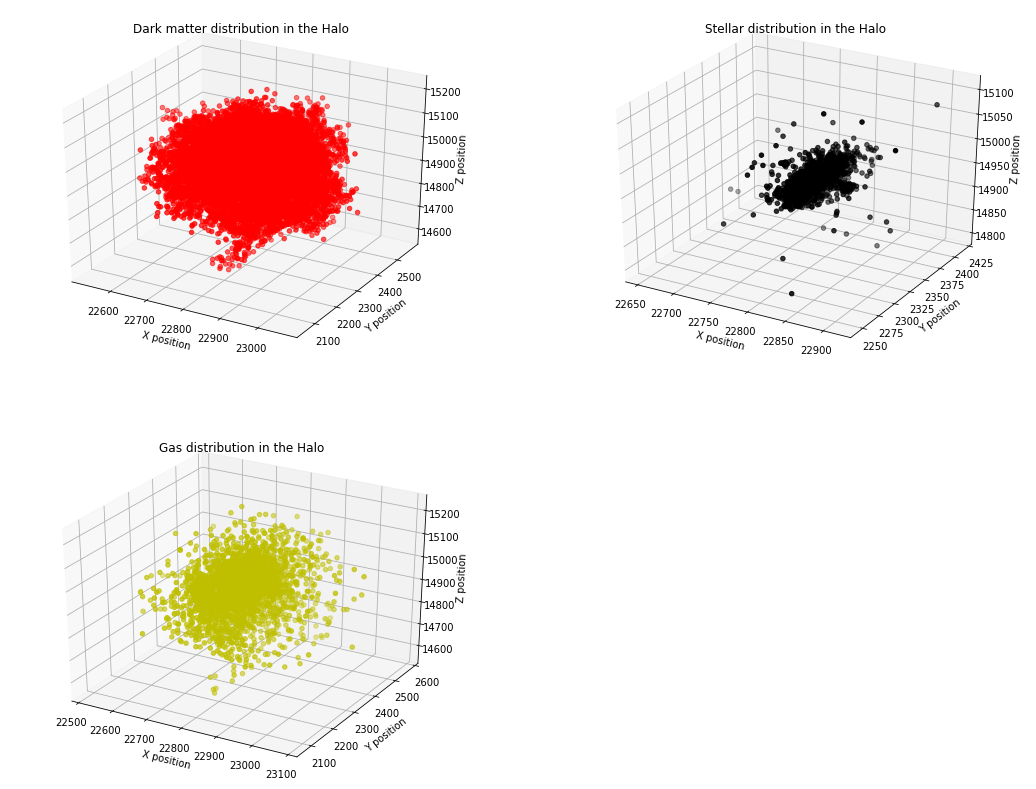

In [6]:
from mpl_toolkits.mplot3d import Axes3D
file = 'snap_m25n256_151'

pos_dm = readsnap(file, 'pos', 'dm')
pos_st = readsnap(file, 'pos', 'star')
pos_g = readsnap(file, 'pos', 'gas')

d_distr = np.array([pos_dm[i] for i in gal1[55].halo.dmlist])
s_distr = np.array([pos_st[i] for i in gal1[55].halo.slist])
g_distr = np.array([pos_g[i] for i in gal1[55].halo.glist])

fig = pl.figure(figsize = (12, 7))

ax_1 = pl.subplot(221, title = 'Dark matter distribution in the Halo', projection = '3d')
ax_1.scatter(d_distr[:,0], d_distr[:,1], d_distr[:,2], c = 'r')
ax_1.set_xlabel('X position')
ax_1.set_ylabel('Y position')
ax_1.set_zlabel('Z position')

ax_2 = pl.subplot(222, title = 'Stellar distribution in the Halo', projection = '3d')
ax_2.scatter(s_distr[:, 0], s_distr[:, 1], s_distr[:, 2], c = 'k')
ax_2.set_xlabel('X position')
ax_2.set_ylabel('Y position')
ax_2.set_zlabel('Z position')

ax_3 = pl.subplot(223, title = 'Gas distribution in the Halo', projection = '3d')
ax_3.scatter(g_distr[:, 0], g_distr[:, 1], g_distr[:, 2], c = 'y')
ax_3.set_xlabel('X position')
ax_3.set_ylabel('Y position')
ax_3.set_zlabel('Z position')

pl.subplots_adjust(right = 1.3, top = 1.65, wspace = .2, hspace = .2)
pl.show()